<a href="https://colab.research.google.com/drive/1LZ8HY1Y5HH0OSqmpHUkSzRE7HTzeMxQo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
import requests


url_dict = {
    'sgd_data.csv': 'https://drive.usercontent.google.com/download?id=14UPDlsLd9sn0aVOCjslCgyB3AtQoYvnZ&export=download&authuser=0&confirm=t&uuid=ae3b4a91-9c34-42b0-8c90-d368456462d3&at=APZUnTWYXEnTwNQ08i_q89zDsaJv:1704950346746'
}


def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [2]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [3]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    loss = np.sum((Y - np.dot(X, w)) ** 2)
    return loss

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    '''

    dw = -2 * (y - np.dot(w, x)) * x
    return dw

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    losses = []
    w = w_start
    for i in range(N_epochs):
      random_indices = np.random.permutation(len(X))
      X = X[random_indices]
      Y = Y[random_indices]
      for i in range(len(X)):
        w -= eta * gradient(X[i], Y[i], w)
      losses.append(loss(X, Y, w))
    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [4]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: GeneratorExitiven as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [5]:
download_file('sgd_data.csv')

Start downloading...
Complete


In [11]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:

data = load_data('sgd_data.csv')
X = data[:, :4]
N = data.shape[0]
X = np.concatenate((np.ones((N, 1)), X), axis=1)
Y = data[:, 4]

eta = np.exp(-15)
w = [0.001, 0.001, 0.001, 0.001, 0.001]
N_epochs = 800
w, losses = SGD(X, Y, w, eta, N_epochs)
print(w)


[ -0.22719156  -5.94211358   3.94389987 -11.72384116   8.78567424]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

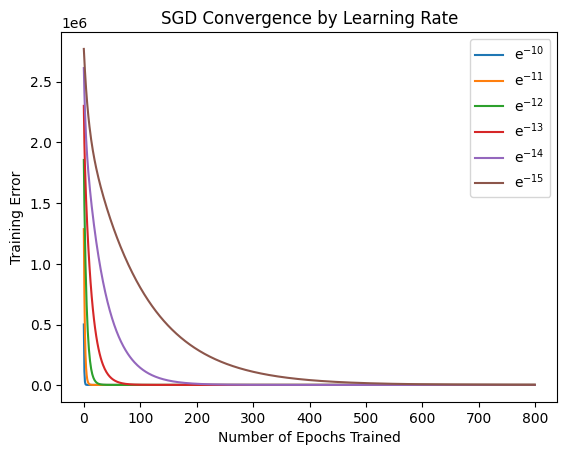

In [16]:
etas = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
plt.figure()
plt.title("SGD Convergence by Learning Rate")
plt.xlabel("Number of Epochs Trained")
plt.ylabel("Training Error")
for eta in etas:
  w = [0.001, 0.001, 0.001, 0.001, 0.001]
  w, losses = SGD(X, Y, w, eta, N_epochs)
  plt.plot(range(N_epochs), losses)

plt.legend(["e$^{-10}$", "e$^{-11}$", "e$^{-12}$", "e$^{-13}$", "e$^{-14}$", "e$^{-15}$"])
plt.show()


## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [18]:
w = np.dot(np.linalg.pinv(X), Y)
print(w)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
